# Detection of phishing websites

## 1. Objectives

A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this notebook is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

## 2. Data collections

For this project, we need a bunch of urls of type legitimate (0) and phishing (1).

The collection of phishing urls is rather easy because of the opensource service called PhishTank. This service provide a set of phishing URLs in multiple formats like csv, json etc. that gets updated hourly. To download the data: https://www.phishtank.com/developer_info.php

For the legitimate URLs, I found a source that has a collection of benign, spam, phishing, malware & defacement URLs. The source of the dataset is University of New Brunswick, https://www.unb.ca/cic/datasets/url-2016.html. The number of legitimate URLs in this collection are 35,300. The URL collection is downloaded & from that, 'Benign_list_big_final.csv' is the file of our interest. This file is then uploaded to the Colab for the feature extraction.

## 3. Collection of URL dataset

### 3.1. Phishing urls dataset

In [53]:
import pandas as pd

In [54]:
phish_data = pd.read_csv("data/full_phishing.csv")

In [55]:
phish_data.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8198091,http://fortmatic.in,http://www.phishtank.com/phish_detail.php?phis...,2023-06-27T17:09:21+00:00,yes,2023-06-27T17:09:39+00:00,yes,Other
1,8198089,https://viacredi.portalpj.app/,http://www.phishtank.com/phish_detail.php?phis...,2023-06-27T17:07:14+00:00,yes,2023-06-27T17:13:15+00:00,yes,Other
2,8198087,https://vintedl457-pols.popover.cfd/?tranzakt1...,http://www.phishtank.com/phish_detail.php?phis...,2023-06-27T17:05:12+00:00,yes,2023-06-27T17:09:39+00:00,yes,Other
3,8198086,https://sp149491.sitebeat.crazydomains.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-06-27T17:05:10+00:00,yes,2023-06-27T17:09:39+00:00,yes,AT&amp;T
4,8198085,https://protocolo65192023.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-06-27T17:05:00+00:00,yes,2023-06-27T17:09:39+00:00,yes,Other


In [56]:
phish_data.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
77545,1850379,https://sites.google.com/site/libretyreserve/,http://www.phishtank.com/phish_detail.php?phis...,2013-05-18T23:52:56+00:00,yes,2013-05-19T13:45:13+00:00,yes,Other
77546,1460953,http://www.habbocreditosparati.blogspot.com/,http://www.phishtank.com/phish_detail.php?phis...,2012-06-14T15:19:26+00:00,yes,2012-06-14T15:29:11+00:00,yes,Sulake Corporation
77547,1123978,http://creditiperhabbogratissicuro100.blogspot...,http://www.phishtank.com/phish_detail.php?phis...,2011-02-18T10:50:32+00:00,yes,2011-02-19T00:05:43+00:00,yes,Sulake Corporation
77548,1041041,http://account-blizzard.com/login.asp?ref=http...,http://www.phishtank.com/phish_detail.php?phis...,2010-08-30T03:57:24+00:00,yes,2023-05-29T23:44:11+00:00,yes,World of Warcraft
77549,549159,http://aijcs.blogspot.com/2005/03/colourful-li...,http://www.phishtank.com/phish_detail.php?phis...,2008-11-07T15:04:00+00:00,yes,2011-09-03T19:15:33+00:00,yes,Other


In [57]:
phish_data.shape

(77550, 8)

In [58]:
#Collecting 1000 Phishing URLs randomly
phish_url = phish_data.sample(n = 1000, random_state = 12).copy()
phish_url = phish_url.reset_index(drop=True)
phish_url.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8193940,https://ervjeurv80.onedumb.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-06-24T05:49:12+00:00,yes,2023-06-24T06:23:47+00:00,yes,Other
1,8018175,http://rechargejio.lagoo.in,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T10:47:20+00:00,yes,2023-01-27T10:52:40+00:00,yes,Other
2,8090431,https://att-102401.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-03-25T05:15:00+00:00,yes,2023-03-25T05:25:30+00:00,yes,Other
3,8031003,https://amazon-dcvbnm.wikaba.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-02-09T04:47:12+00:00,yes,2023-02-09T05:21:41+00:00,yes,Amazon.com
4,8027324,http://airdrop.zskync.com,http://www.phishtank.com/phish_detail.php?phis...,2023-02-06T06:16:36+00:00,yes,2023-02-06T06:22:32+00:00,yes,Other


In [59]:
phish_url.shape

(1000, 8)

### 3.2. Legitimate urls dataset

In [60]:
legit_data = pd.read_csv("data/full_legimate.csv")

In [61]:
legit_data.head()

,url
0,http://1337x.to/torrent/1048648/American-Snipe...
1,http://1337x.to/torrent/1110018/Blackhat-2015-...
2,http://1337x.to/torrent/1122940/Blackhat-2015-...
3,http://1337x.to/torrent/1124395/Fast-and-Furio...
4,http://1337x.to/torrent/1145504/Avengers-Age-o...


In [62]:
legit_data.shape

(35378, 1)

In [63]:
#Collecting 1000 Legitimate URLs randomly
legi_url = legit_data.sample(n = 1000, random_state = 12).copy()
legi_url = legi_url.reset_index(drop=True)
legi_url.head()

,url
0,http://graphicriver.net/search?date=this-month...
1,https://foursquare.com/v/%D1%81%D0%B0%D0%B2%D0...
2,http://shop-pro.jp/magazine/wp-content/themes/...
3,http://motthegioi.vn/the-gioi-xe/o-to-chat-luo...
4,http://tobogo.net/cdsb/board.php?board=dailyst...


In [64]:
legi_url.shape

(1000, 1)

## 4. Feature Extraction


### 4.1. URL-based features

- domain of url
- IP address in URL
- length of url
- depth of url
- "http/https" in Domain
- Using URL Shortening Services “TinyURL”
- Count of prefix or sufix "-" in Domain
- Count of prefix or sufix "_" in Domain
- Sub-domain length
- "client" in string
- "admin" in string
- "login" in string
- "server" in string

In [65]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

#### 4.1.1. Domain of url

We are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

In [66]:
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www.",domain):
        domain = domain.replace("www.","")
    return domain

#### 4.1.2. Length of URL

Phishing URLs may have excessively long domains or domain strings that appear unusual or unrelated to the legitimate domain.

In [67]:
def lengthURL(url):
    return len(url)

#### 4.1.3. Depth of URL

Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

The value of feature is a numerical based on the URL.

In [68]:
def depthURL(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j])!=0:
            depth = depth+1
    return depth

#### 4.1.4. "http/https" in Domain name

Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.

If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [69]:
def httpDomain(url):
    if "https" in url:
        return 1
    else:
        return 0

In [70]:
httpDomain("https://smbc-yzkj.shop")

1

#### 4.1.5. URL shortening

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [71]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [72]:
def tinyURL(url):
    match = re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

#### 4.1.6. Preffix or Suffix "-" in Domain

Phishing domains are often designed to trick users into believing they are legitimate websites, typically imitating well-known brands or organizations. One common technique used in phishing domains is the inclusion of a hyphen ("-") to deceive users.

The hyphen is sometimes inserted in a phishing domain to make it visually similar to the legitimate domain it is impersonating. For example, if the legitimate domain is "example.com," the phishing domain may appear as "ex-ample.com" or "examp-le.com." By inserting the hyphen, scammers hope to exploit users' inattentiveness or typosquatting, where users mistakenly type the wrong characters or misspell a legitimate domain.

In [73]:
def hyphenURL(url):
    if '-' in urlparse(url).netloc:
        return 1
    else:
        return 0

#### 4.1.7. Preffix or Suffix "_" in Domain

Phishers often try to mimic legitimate websites by using domain names that are similar to the targeted website's domain. They may use techniques such as replacing letters with numbers or using similar-looking characters. However, the use of "_" is not typically used as a deliberate tactic to deceive users, as it is not a common practice in legitimate domain names.

In [75]:
def underscoreURL(url):
    if '_' in urlparse(url).netloc:
        return 1
    else:
        return 0

#### 4.1.8. Length of Sub-domain

Phishing URLs may have excessively long subdomains or subdomain strings that appear unusual or unrelated to the legitimate domain. For example, "login.yourbank.com.phishingsite.com."

In [76]:
def subURl(url):
    p = urlparse(url).path.split('.')
    sub = 0
    for j in range(len(p)):
        if len(p[j])!=0:
            sub = sub+1
    return sub

#### Keywords in URL

Look for keywords in the URL that suggest fraudulent activities, such as "login", "client", "admin", "server", or "account." Phishing URLs often try to deceive users into believing they are accessing sensitive pages.

#### 4.1.9. "Client" in string

In [77]:
def clientURL(url):
    if "client" in url:
        return 1
    else:
        return 0

#### 4.1.10. "Admin" in string

In [79]:
def adminURL(url):
    if "admin"in url:
        return 1
    else:
        return 0

#### 4.1.11. "Server" in string

In [81]:
def serverURL(url):
    if "server" in url:
        return 1
    else:
        return 0

#### 4.1.12. "Login" in string

In [83]:
def loginURL(url):
    if "login" in url:
        return 1
    else:
        return 0

### 4.2. Domain-based features

- DNS record
- Age of domain
- End period of domain

In [86]:

# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

#### 4.2.1. DNS record

For phishing websites, either the claimed identity is not recognized by the WHOIS database or no records founded for the hostname. If the DNS record is empty or not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [87]:
# DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

#### 4.2.2. Age of domain

This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.

If age of domain > 12 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [88]:
import whois
from datetime import datetime

def domainAge(domain_name):
    creation_date = domain_name.creation_date
    expiration_date = domain_name.expiration_date
    if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
        try:
            creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if ((expiration_date is None) or (creation_date is None)):
        return 1
    elif ((type(expiration_date) is list) or (type(creation_date) is list)):
        return 1
    else:
        ageofdomain = abs((expiration_date - creation_date).days)
        if ((ageofdomain/30) < 6):
            age = 1
        else:
            age = 0
    return age

#### 4.2.3. End period of Domain

This feature can be extracted from WHOIS database. For this feature, the remaining domain time is calculated by finding the different between expiration time & current time. The end period considered for the legitimate domain is 6 months or less for this project.

If end period of domain > 6 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

In [89]:
def domainEnd(domain_name):
    expiration_date = domain_name.expiration_date
    if isinstance(expiration_date,str):
        try:
            expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
        except:
            return 1
    if (expiration_date is None):
        return 1
    elif (type(expiration_date) is list):
        return 1
    else:
        today = datetime.now()
        end = abs((expiration_date - today).days)
        if ((end/30) < 6):
            end = 0
        else:
            end = 1
    return end

### 4.3. Content-based Features

- IFrame redirection
- Webiste forwarding

#### 4.3.1. IFrame redirection

IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.

If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [90]:
import requests
import re

In [91]:
def iframe(response):
    if response == "":
        return 1
    else:
        if re.findall(r"[|]", response.text):
            return 0
        else:
            return 1

#### 4.3.2. Website forwarding

The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.

In [92]:
def forwarding(response):
    if response == "":
        return 1
    else:
        if len(response.history) <= 2:
            return 0
        else:
            return 1

## 5. URL feature extraction

Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [93]:
def featureExtraction(url, label):
    features = []

    #URL-based feature
    features.append(getDomain(url))
    features.append(lengthURL(url))
    features.append(depthURL(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(hyphenURL(url))
    features.append(underscoreURL(url))
    features.append(subURl(url))
    features.append(clientURL(url))
    features.append(adminURL(url))
    features.append(serverURL(url))
    features.append(loginURL(url))
    
    
    
    #Domain based features
    dns = 0
    try:
        domain_name = whois.whois(urlparse(url).netloc)
    except:
        dns = 1

    features.append(dns)
    features.append(1 if dns == 1 else domainAge(domain_name))
    features.append(1 if dns == 1 else domainAge(domain_name))

    #Content-based feature

    try:
        response = requests.get(url)
    except:
        response = ""
    
    features.append(iframe(response))
    features.append(forwarding(response))
    features.append(label)

    return features
    

### 5.1. Legitimate URLs:

Feature extraction is done on legitimate URLs.

In [94]:
#Extracting the features & storing them in a list
legi_features = []
label = 0

for i in range(0, 1000):
    url = legi_url["url"][i]
    legi_features.append(featureExtraction(url,label))
    # print(legi_features)

0
1
2
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
3
4
5
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
6
7
8
9
10
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
11
12
13
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
14
15
16
17
18
19
20
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
66
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
67
68
69
70
71
Error trying to connect to socket: closing socket - [Errno -2] Name or service not

In [98]:
#Converting the list to dataframe
feature_name = ["domain","url_len","url_dep","httpDomain","tinyURL","hyphenURL",
                "underscoreURL","subURl","clientURL","adminURL","serverURL","loginURL", "dns","domainAge","domainEnd","iframe","forwarding","label"]

legitimate = pd.DataFrame(legi_features, columns=feature_name)

In [99]:
legitimate.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,graphicriver.net,138,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,foursquare.com,180,3,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
2,shop-pro.jp,89,6,0,0,1,0,5,0,0,0,0,0,1,1,1,0,0
3,motthegioi.vn,100,2,0,0,0,0,2,0,0,0,0,0,1,1,1,1,0
4,tobogo.net,113,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0


In [100]:
legitimate.to_csv('data/legitimate.csv')

### 5.2. Phishing URLs:

Feature extraction is done on phishing URLs.

In [101]:
#Extracting the features & storing them in a list
phish_features = []
label = 1

for i in range(0, 1000):
    url = phish_url["url"][i]
    phish_features.append(featureExtraction(url,label))
    # print(legi_features)

0
1
2
3
4
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
5
6
7
8
9
10
11
12
13
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
118
119
120
121
122
123
124
125
126
127
128
129
130
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
131
132
133
134
135
Error trying to connect to socke

In [105]:
#Converting the list to dataframe
feature_name = ["domain","url_len","url_dep","httpDomain","tinyURL","hyphenURL",
                "underscoreURL","subURl","clientURL","adminURL","serverURL","loginURL", "dns","domainAge","domainEnd","iframe","forwarding","label"]

phishing = pd.DataFrame(phish_features, columns=feature_name)
phishing.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,ervjeurv80.onedumb.com,31,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1
1,rechargejio.lagoo.in,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,att-102401.weeblysite.com,34,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,1
3,amazon-dcvbnm.wikaba.com,33,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1
4,airdrop.zskync.com,25,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [106]:
phishing.tail()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
995,c6zq101.duckdns.org,26,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
996,rb.gy,20,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
997,date-update-ups.com,27,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1
998,bafybeihjxu4ce4eox5zt4ieqxbo3vjhjwkplzqjuofoka...,96,1,1,0,0,0,2,0,0,0,0,0,0,0,1,0,1
999,walldesign.com.tr,43,3,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1


In [107]:
phishing.to_csv('data/final_phishing.csv')

### 5.3. Final dataset

In the above section we formed two dataframes of legitimate & phishing URL features. Now, we will combine them to a single dataframe and export the data to csv file for the Machine Learning training done in other notebook

In [108]:
#Concatenating the dataframes into one 
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata = urldata.sample(frac=1, random_state=1).reset_index(drop=True)
urldata.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,grantland.com,91,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,ipfs.io,97,3,1,0,0,0,2,0,0,0,0,0,0,0,1,0,1
2,t.co,32,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1
3,recoverysupport.infinityvehicles.in,48,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,fir41109.firebaseapp.com,33,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1


In [109]:
urldata.tail()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
1995,att-yahoo-101878.weeblysite.com,40,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1
1996,wallet.callisto.orgdotorg.org,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1997,trackandtrace-postoffice-online.shop,51,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1
1998,grantland.com,147,2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1999,seoservicesiox.firebaseapp.com,39,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1


In [110]:
urldata.to_csv('data/urldata.csv', index=False)

## 6. Loading final datastet

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
urldata = pd.read_csv("data/urldata.csv")

In [114]:
urldata.head()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
0,grantland.com,91,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,ipfs.io,97,3,1,0,0,0,2,0,0,0,0,0,0,0,1,0,1
2,t.co,32,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1
3,recoverysupport.infinityvehicles.in,48,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,fir41109.firebaseapp.com,33,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1


In [115]:
urldata.tail()

,domain,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding,label
1995,att-yahoo-101878.weeblysite.com,40,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1
1996,wallet.callisto.orgdotorg.org,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1997,trackandtrace-postoffice-online.shop,51,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1
1998,grantland.com,147,2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1999,seoservicesiox.firebaseapp.com,39,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1


## 7. Data Preprocessing and EDA of the URL dataset

### 7.1. Shape of the dataet

In [116]:
urldata.shape

(2000, 18)

### 7.2. Dataset Columns

In [117]:
urldata.columns

Index(['domain', 'url_len', 'url_dep', 'httpDomain', 'tinyURL', 'hyphenURL',
       'underscoreURL', 'subURl', 'clientURL', 'adminURL', 'serverURL',
       'loginURL', 'dns', 'domainAge', 'domainEnd', 'iframe', 'forwarding',
       'label'],
      dtype='object')

### 7.3. Dataset information

In [118]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   domain         2000 non-null   object
 1   url_len        2000 non-null   int64 
 2   url_dep        2000 non-null   int64 
 3   httpDomain     2000 non-null   int64 
 4   tinyURL        2000 non-null   int64 
 5   hyphenURL      2000 non-null   int64 
 6   underscoreURL  2000 non-null   int64 
 7   subURl         2000 non-null   int64 
 8   clientURL      2000 non-null   int64 
 9   adminURL       2000 non-null   int64 
 10  serverURL      2000 non-null   int64 
 11  loginURL       2000 non-null   int64 
 12  dns            2000 non-null   int64 
 13  domainAge      2000 non-null   int64 
 14  domainEnd      2000 non-null   int64 
 15  iframe         2000 non-null   int64 
 16  forwarding     2000 non-null   int64 
 17  label          2000 non-null   int64 
dtypes: int64(17), object(1)
memo

### 7.4. Dataset Summary

In [119]:
urldata.describe

<bound method NDFrame.describe of                                     domain  url_len  url_dep  httpDomain  \
0                            grantland.com       91        1           0   
1                                  ipfs.io       97        3           1   
2                                     t.co       32        1           1   
3      recoverysupport.infinityvehicles.in       48        0           1   
4                 fir41109.firebaseapp.com       33        0           1   
...                                    ...      ...      ...         ...   
1995       att-yahoo-101878.weeblysite.com       40        0           1   
1996         wallet.callisto.orgdotorg.org       37        0           0   
1997  trackandtrace-postoffice-online.shop       51        1           1   
1998                         grantland.com      147        2           0   
1999        seoservicesiox.firebaseapp.com       39        0           1   

      tinyURL  hyphenURL  underscoreURL  subURl  clie

The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

### 7.5.Check of Null values

In [120]:
urldata.isnull().sum()

domain           0
url_len          0
url_dep          0
httpDomain       0
tinyURL          0
hyphenURL        0
underscoreURL    0
subURl           0
clientURL        0
adminURL         0
serverURL        0
loginURL         0
dns              0
domainAge        0
domainEnd        0
iframe           0
forwarding       0
label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 1000 rows of legitimate url data & bottom 1000 of phishing url data.

### 7.6. Dropping column name "domain"

In [121]:
urldata = urldata.drop(['domain'],axis = 1)

In [122]:
urldata.columns

Index(['url_len', 'url_dep', 'httpDomain', 'tinyURL', 'hyphenURL',
       'underscoreURL', 'subURl', 'clientURL', 'adminURL', 'serverURL',
       'loginURL', 'dns', 'domainAge', 'domainEnd', 'iframe', 'forwarding',
       'label'],
      dtype='object')

### 7.7. Max and Min of "url_len"

In [123]:
print("Maximum of url length::",urldata["url_len"].max())
print("Minimum of url length::",urldata["url_len"].min())

Maximum of url length:: 42949
Minimum of url length:: 16


### 7.8. Max and Min of "url_depth"

In [124]:
print("Maximum of url depgth::",urldata["url_dep"].max())
print("Minimum of url length::",urldata["url_dep"].min())

Maximum of url depgth:: 17
Minimum of url length:: 0


## 8. Data Visualization 

### 8.1. Plotting the data distribution

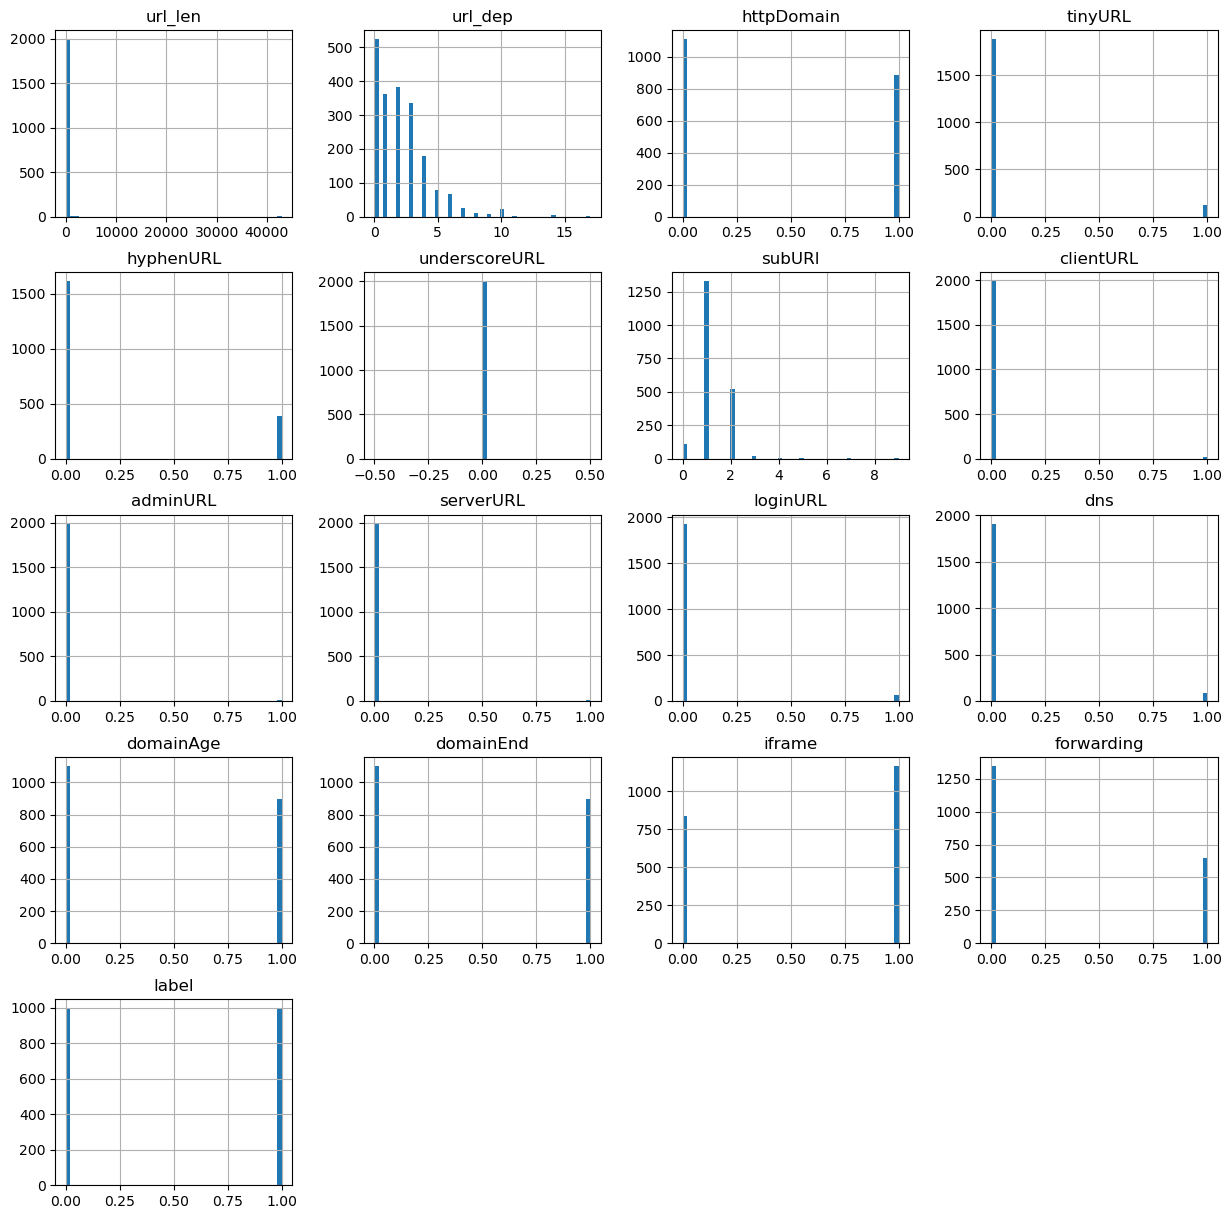

In [125]:
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

### 8.2. Correlation heatmap

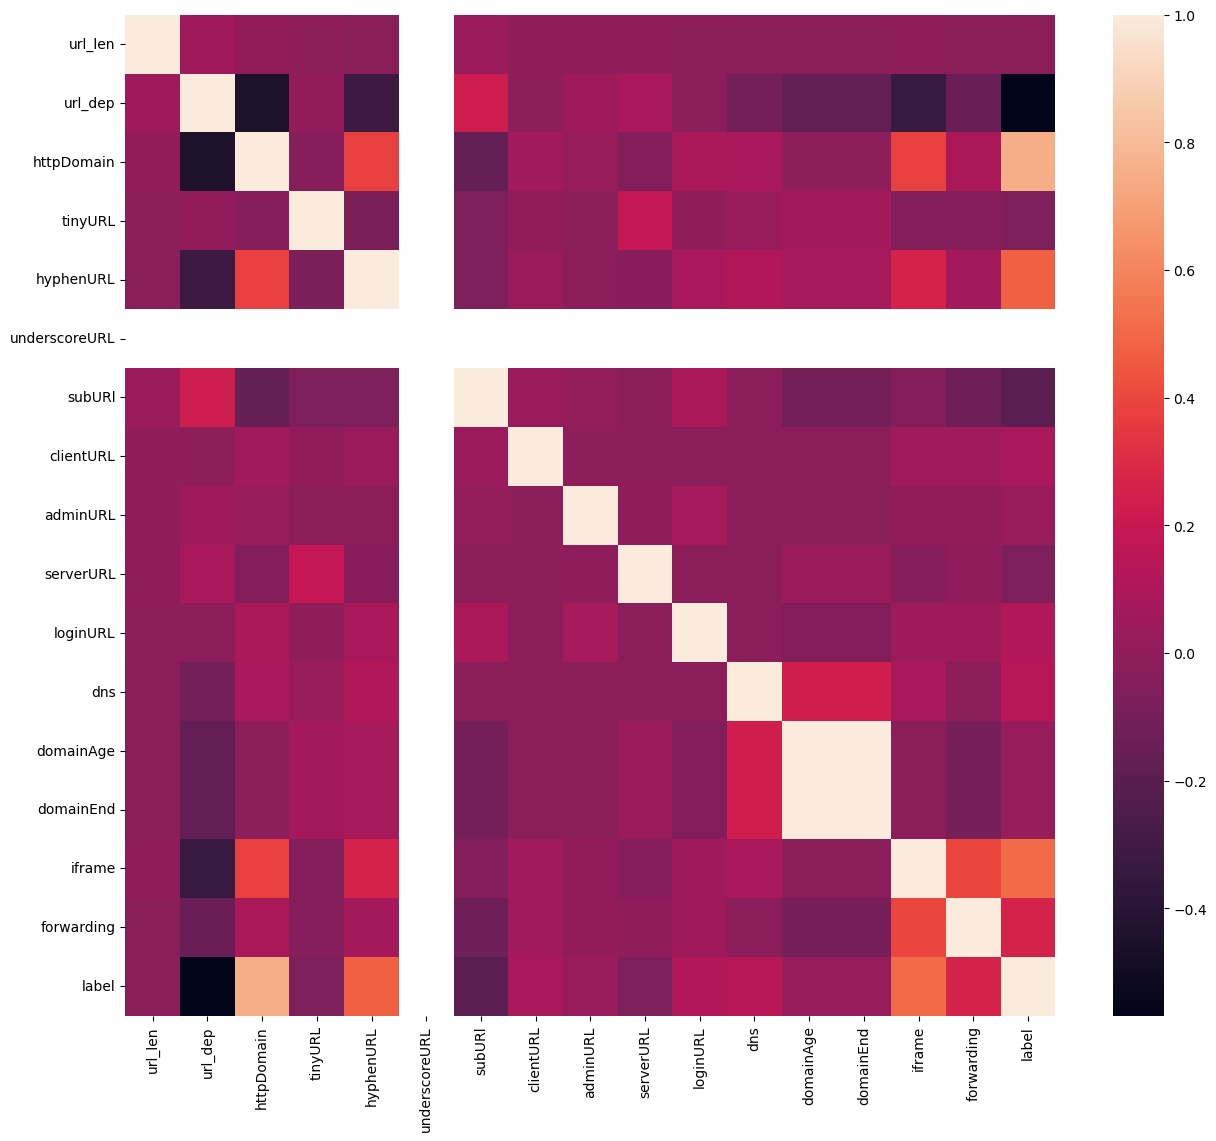

In [127]:
plt.figure(figsize=(15,13))
sns.heatmap(urldata.corr())
plt.show()

In [2]:
import pandas as pd

urldata = pd.read_csv("data/urldata.csv")

## 9. Splitting the Dataset

In [17]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((1400, 16), (600, 16))

## 10. Machine Learning models and Training

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset:

- Decision Tree
- Random Forest
- XGBoost
- Logistic Regression
- Support Vectore Machines (SVM)
- Multilayer perceptrons
- Autoencoder Neural Network

In [29]:
#importing packages
from sklearn.metrics import accuracy_score

In [30]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

### 10.1. Decision Tree Classifier

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [31]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation

In [33]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.977
Decision Tree: Accuracy on test Data: 0.985


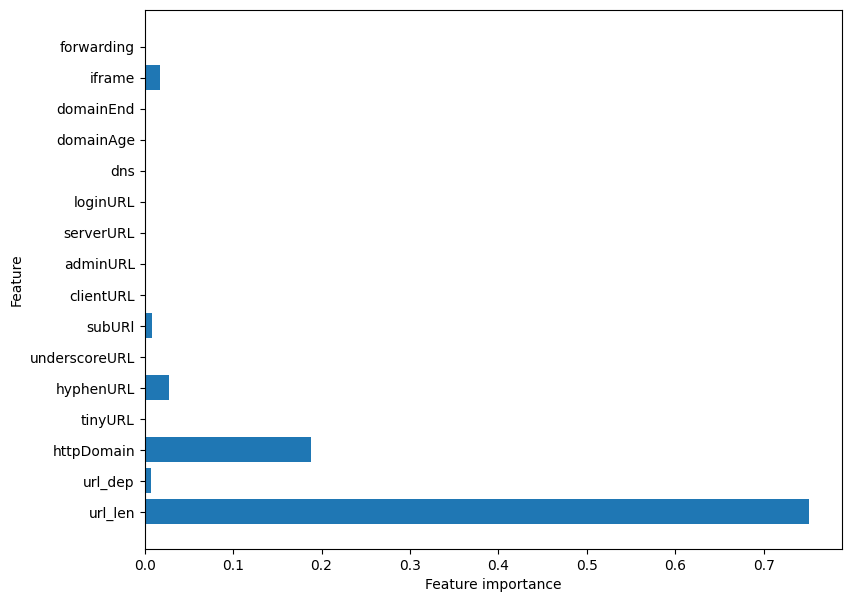

In [34]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing Results:

In [35]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### 10.2. Random Forest

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [36]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [37]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#### Performance Evaluation

In [38]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.976
Random forest: Accuracy on test Data: 0.983


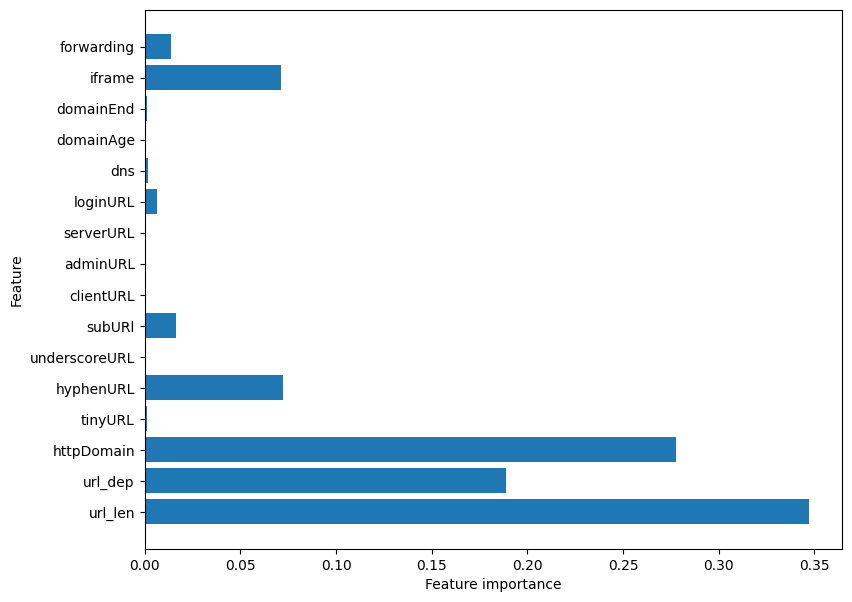

In [39]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Storing Results

In [40]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### 10.3. XGBoost

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [41]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

#### Performance Evaluation

In [43]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.998
XGBoost : Accuracy on test Data: 0.987


#### Storing Results

In [44]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### 10.4. Logistic Regression

In machine learning, logistic regression is a classification algorithm used to model the relationship between input features and a binary output variable. It estimates the probability of the output belonging to a specific class using a logistic or sigmoid function.
During training, it learns optimal parameters by minimizing a cost function, such as cross-entropy loss. Once trained, it can make predictions on new data by calculating the probability of belonging to a class. Logistic regression is widely used in various domains for binary classification tasks when a linear relationship is assumed.

In [45]:
#Logistic regression machine learning

from sklearn.linear_model import LogisticRegression

#instantive the model
logistic = LogisticRegression(random_state = 12)
#fit the model
logistic.fit(X_train, y_train)

C:\Users\Rohan\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=12)

In [46]:
#predicting the target value from the model for the samples
y_test_log = logistic.predict(X_test)
y_train_log = logistic.predict(X_train)

#### Performance Evaluation

In [47]:
#computing the accuracy of the model performance
acc_train_log = accuracy_score(y_train,y_train_log)
acc_test_log = accuracy_score(y_test,y_test_log)

print("Logistic: Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic : Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic: Accuracy on training Data: 0.943
Logistic : Accuracy on test Data: 0.955


#### Storing Result

In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic', acc_train_log, acc_test_log)

### 10.5. Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [49]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [50]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#### Performance Evaluation

In [51]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.951
SVM : Accuracy on test Data: 0.952


#### Storing Result

In [52]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### 10.6. Multilayer Perceptrons (MLPs)

Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [53]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [54]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### Performance Evaluation

In [55]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.950
Multilayer Perceptrons: Accuracy on test Data: 0.963


#### Storing Result

In [56]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## 11. Comparison of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [57]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.977,0.985
1,Random Forest,0.976,0.983
2,XGBoost,0.998,0.987
3,Logistic,0.943,0.955
4,SVM,0.951,0.952
5,Multilayer Perceptrons,0.950,0.963


In [58]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.998,0.987
0,Decision Tree,0.977,0.985
1,Random Forest,0.976,0.983
5,Multilayer Perceptrons,0.950,0.963
3,Logistic,0.943,0.955
4,SVM,0.951,0.952


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [68]:
import numpy as np

z=np.array([[91, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

#Converting the list to dataframe
feature_name1 = ["url_len","url_dep","httpDomain","tinyURL","hyphenURL",
                "underscoreURL","subURl","clientURL","adminURL","serverURL","loginURL", "dns","domainAge","domainEnd","iframe","forwarding"]

z_1 = pd.DataFrame(z, columns=feature_name1)

z_1

,url_len,url_dep,httpDomain,tinyURL,hyphenURL,underscoreURL,subURl,clientURL,adminURL,serverURL,loginURL,dns,domainAge,domainEnd,iframe,forwarding
0,91,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0


In [72]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("data/XGBoostClassifier.pkl", "wb"))

### Testing the saved model:

In [73]:
# load model from file
loaded_model = pickle.load(open("data/XGBoostClassifier.pkl", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)